# UNSUPERVISED LEARNING ALGORITHMS: K- MEANS AND HIERARCHICAL CLUSTERING

In [326]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [327]:
#Read the csv file
dataframe = pd.read_csv('publications.csv')

In [328]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [329]:
dataframe.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [330]:
#check the shape of the df
dataframe.shape

(7050, 16)

In [331]:
#check how many null entries are present in the dataset
dataframe.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [332]:
#delete columns where there is no information
dataframe.drop(columns=['Column1','Column2','Column3','Column4'], inplace=True)

In [333]:
dataframe.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [334]:
#Divide the published date and time from the dataframe into two separate columns
dataframe[['published_date','published_time']] = dataframe['status_published'].str.split(' ', expand=True)


In [335]:
#delete column that contained both date and time
dataframe.drop(columns=['status_published'])

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,published_date,published_time
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,4/18/2018,3:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,9/24/2016,2:58
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,9/23/2016,11:19
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,9/21/2016,23:03
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,9/20/2016,0:43


In [336]:
#Scale the data so all features are between 0 and 1 and no bias is generated when the model is implemented
scaled_data = dataframe[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)
     

In [337]:
#check shape, mean and std of the scaled data
scaled_data.shape
np.mean(scaled_data), np.std(scaled_data)

(-1.1198467072657214e-18, 1.0)

In [338]:
#convert the scaled features into a dataframe
scaled_features = pd.DataFrame(scaled_data, columns=['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys'])

In [339]:
scaled_features

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


In [340]:
#Concatenate the scaled features with the label to have a clear visualization 
scaled_features_categorical = pd.concat([scaled_features, dataframe['status_type']], axis = 1)

<AxesSubplot:xlabel='num_reactions', ylabel='num_comments'>

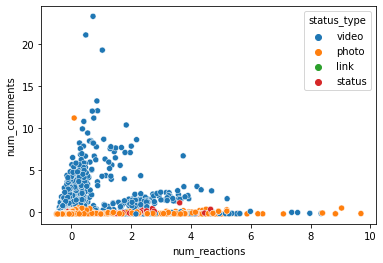

In [341]:
#plot possible features that contribute to the clustering of labels

sns.scatterplot(data= scaled_features_categorical, x = 'num_reactions',y='num_comments', hue = 'status_type')

<AxesSubplot:xlabel='num_reactions', ylabel='num_shares'>

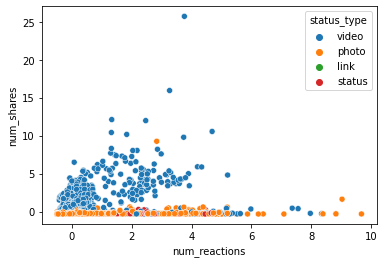

In [342]:
#plot possible features that contribute to the clustering of labels

sns.scatterplot(data= scaled_features_categorical, x = 'num_reactions',y='num_shares', hue = 'status_type')

<AxesSubplot:xlabel='num_comments', ylabel='num_shares'>

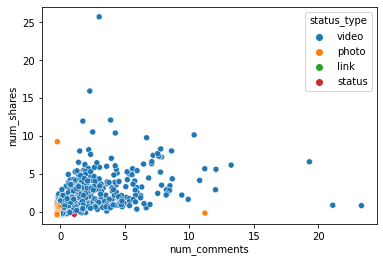

In [343]:
#plot possible features that contribute to the clustering of labels

sns.scatterplot(data= scaled_features_categorical, x = 'num_comments',y='num_shares', hue = 'status_type')

None of the features used in the plots above seem to be involved in the generation of clear clusters in the dataset. 
Because of that reason a PCA will be performed on the data, to reduce dimensionality and have the possibility to better explore the clusters in the data set. 

### IMPLEMENTING PCA INTO THE DATASET

In [344]:
#create pca object and train the model with the given features 
pca = PCA(n_components= 2)
pca.fit(scaled_features_categorical.iloc[:,:-1])
pca_social_media= pca.transform(scaled_features)

In [345]:
pca_social_media.shape

(7050, 2)

In [366]:
#Convert into a dataframe
pc_df= pd.DataFrame(pca_social_media, columns=['PC1','PC2'])
pc_df.head()

,PC1,PC2
0,2.255817,-0.122109
1,-0.632921,0.047366
2,0.100804,-0.057427
3,-0.682104,-0.061251
4,-0.453211,0.170515


In [346]:
#Create new columns in the scaled_features_categorical using the columns from PC1/PC2
scaled_features_categorical['PC1'] = pca_social_media[:,0]
scaled_features_categorical['PC2'] = pca_social_media[:,1]

In [347]:
scaled_features_categorical.head(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type,PC1,PC2
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,video,2.255817,-0.122109
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,photo,-0.632921,0.047366


In [348]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.3832663  0.19289793]


The first component accounts for 38% of the information from the original features, while the second component holds for 19% of the information.

## Visualizing principal component analysis

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

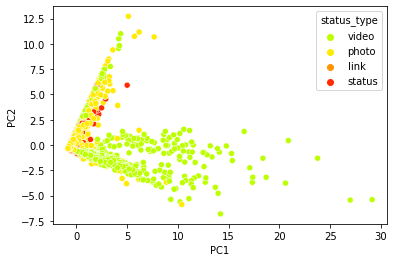

In [349]:
#visualize the clusters after principal component analysis was used
sns.scatterplot(data =scaled_features_categorical, x= 'PC1', y='PC2', hue = 'status_type', palette= 'prism_r')


### EXPLORING UNSUPERVISED LEARNING ALGORITHMS

#### K-MEANS

In [350]:

from random import random

#create list within cluster sum of squares to determine the best # of clusters for the dataset
#testing up to 10 clusters 

wcss = [] #within cluster sum of squares for each possible cluster
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters= i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(pca_social_media)
    wcss.append(kmeans_pca.inertia_)



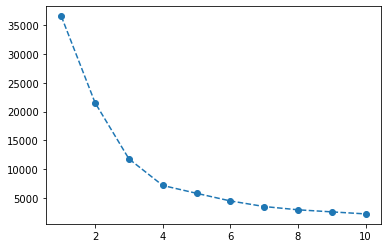

In [351]:
#plot the WCSS and use the elbow method to determine the number of clusters
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')


Based on the elbow method. The optimal number for clusters is 4, since it is the point after which the intertia starts decreasing in a linear fashion. 

### IMPLEMENTATION OF K-MEANS USING 4 CLUSTERS

In [352]:
#Initialize the model with 4 clusters
kmeans_pca = KMeans(n_clusters= 4, init = 'k-means++', random_state=42)

In [353]:
#Fit the data with the pca model 
kmeans_pca.fit(pca_social_media)

KMeans(n_clusters=4, random_state=42)

### RESULTS

In [354]:
#Insert new column with the results of k-means in scaled_feature_categorical dataset
scaled_features_categorical['K-means'] = kmeans_pca.labels_
scaled_features_categorical.drop(columns=['status_type'], axis= 1, inplace=True)

In [355]:
scaled_features_categorical.head(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,PC1,PC2,K-means
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,2.255817,-0.122109,3
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.632921,0.047366,0


In [356]:
#Count how many n belongs to each cluster
scaled_features_categorical['K-means'].value_counts()

0    5920
3     653
1     376
2     101
Name: K-means, dtype: int64

In [357]:
#Replace numbers on the K-means column by names
scaled_features_categorical['K-means'].replace([0,1,2,3],['first','second','third','fourth'], inplace = True)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

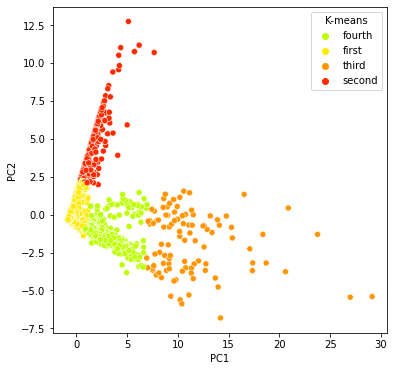

In [375]:
#visualize the resulting clusters using K-means
plt.figure(figsize=(6,6))
sns.scatterplot(data = scaled_features_categorical, x = 'PC1', y= 'PC2', hue= 'K-means', palette= 'prism_r')

#### HIERARCHICAL CLUSTERING 

In [359]:
#import the required library
import scipy.cluster.hierarchy as sch

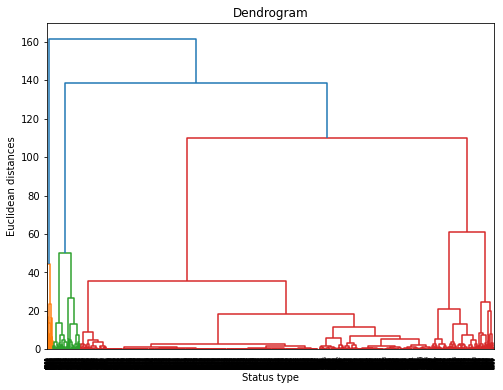

In [374]:
#Using the dendogram to visualize the possible #of clusters created
plt.figure(figsize=(8,6))
plt.title('Dendrogram')
plt.xlabel('Status type')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(pc_df, method  = "ward"))
plt.show()

Since the dendogram shows three clusters we set n_clusters = 4  when using the aglomerative clustering. 

In [371]:
#import the library
from sklearn.cluster import AgglomerativeClustering

#create an object and define parameters
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(pc_df)

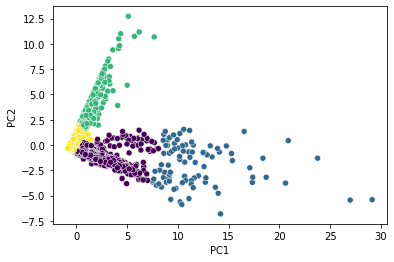

In [373]:
#Visualizing the clusters
sns.scatterplot(data =pc_df, x= 'PC1', y ='PC2', c= labels)
plt.show()